In [1]:
%load_ext autoreload
%autoreload 2

## import lib 

In [2]:
import numpy as np 
import mne
import scipy as sp 
import pandas as pd 

import plotly as py
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"

import seaborn as sns 
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv("../data/EEGArchi13mPFC.txt")
windows = 50
sampling_freq = 15_000/windows
# dans le code mathlab 250 Hz mais pas sur => car sinon analyse de 2h ce qui nous semble incohérent avec les données biologiques

df["time"] = df.index*1/sampling_freq
df = df.rename(columns={"0": "µV"})

test_r = list(df["µV"])
test_r = [np.mean(x) for x in test_r[::windows]]
test_r = pd.DataFrame(test_r)
test_r["time"] = test_r.index*1/sampling_freq

In [12]:
px.histogram(test_r, x=0, nbins=5000)

Creating RawArray with float64 data, n_channels=1, n_times=34790
    Range : 0 ... 34789 =      0.000 ...   115.963 secs
Ready.


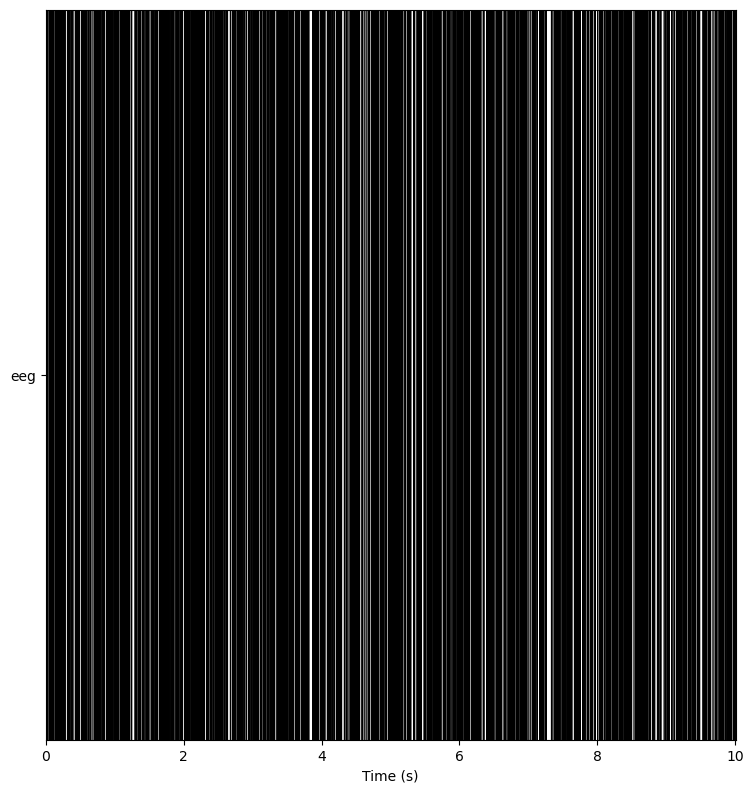

Effective window size : 6.827 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\Tom\AppData\Local\Temp\ipykernel_18372\3481066990.py:10: RuntimeWarning:

Channel locations not available. Disabling spatial colors.



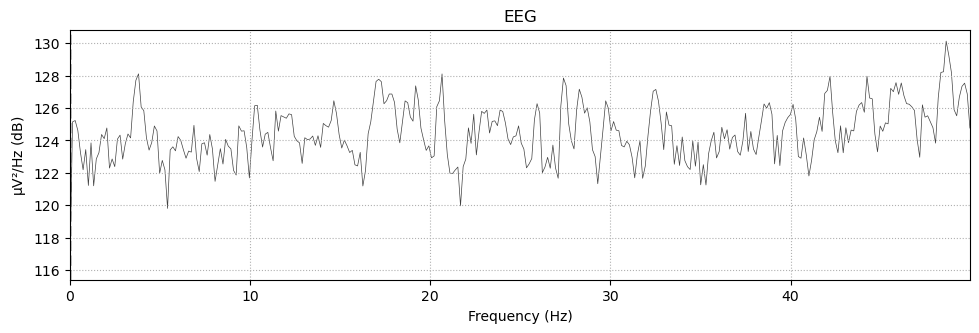

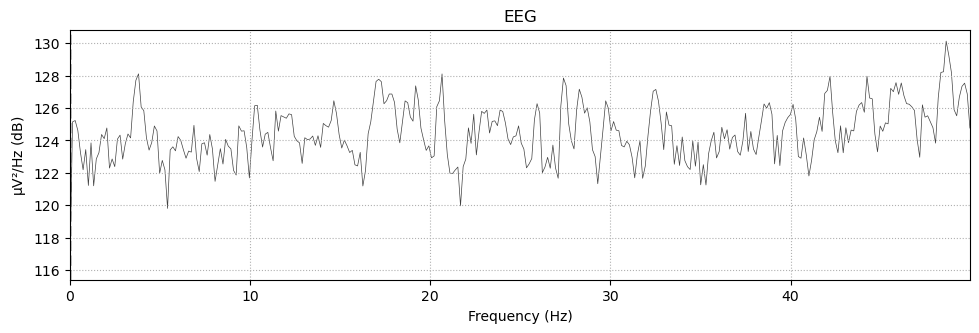

In [41]:
eeg = test_r[0]
data = np.array([eeg])

info = mne.create_info(ch_names=['eeg'],
                       ch_types=['eeg'],
                       sfreq=sampling_freq)

simulated_raw = mne.io.RawArray(data, info)
simulated_raw.plot(show_scrollbars=False, show_scalebars=False)
simulated_raw.plot_psd(fmax=50)
# plt.plot(test_r["time"],test_r[0])
# plt.show()

Opening raw data file C:\Users\Tom\mne_data\MNE-sample-data\MEG\sample\sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Effective window size : 13.639 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


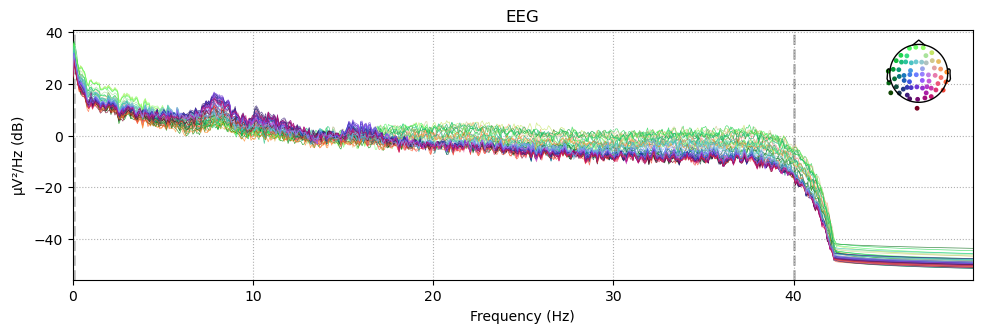

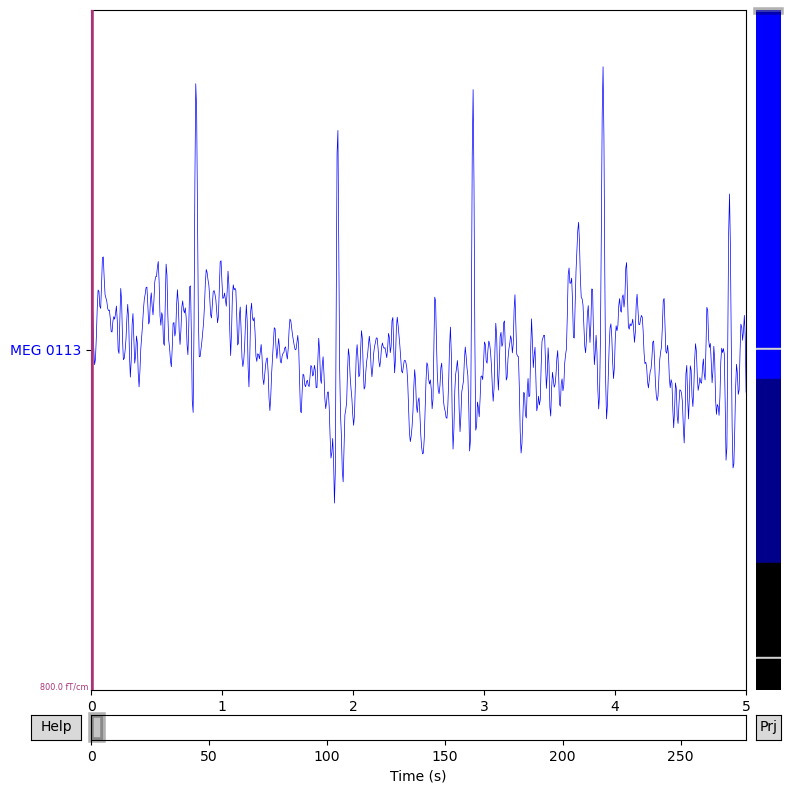

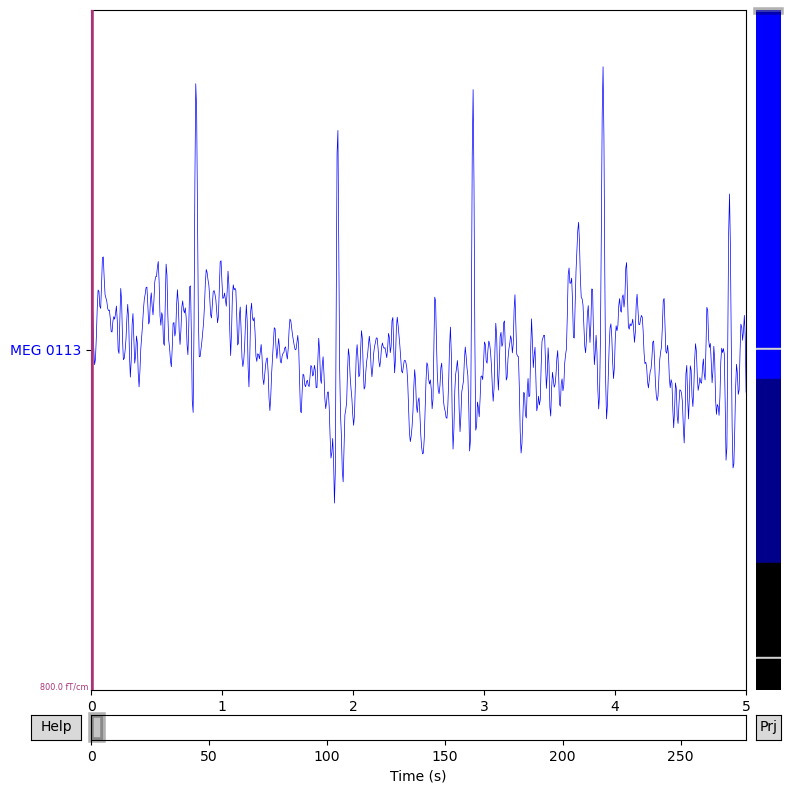

In [36]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = (sample_data_folder / 'MEG' / 'sample' /
                        'sample_audvis_filt-0-40_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)
# raw = raw["eeg"]  
raw.plot_psd(fmax=50,picks=['eeg'])
raw.plot(duration=5, n_channels=1)

In [32]:
eeg = list(raw["eeg"][0][0])
time = list(raw["eeg"][1])
df_provided = pd.DataFrame(eeg)
df_provided["time"] = time
px.histogram(df_provided, x=0, nbins=5000)


Creating RawArray with float64 data, n_channels=1, n_times=41700
    Range : 0 ... 41699 =      0.000 ...   138.997 secs
Ready.
Effective window size : 6.827 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\Tom\AppData\Local\Temp\ipykernel_18372\534660142.py:10: RuntimeWarning:

Channel locations not available. Disabling spatial colors.



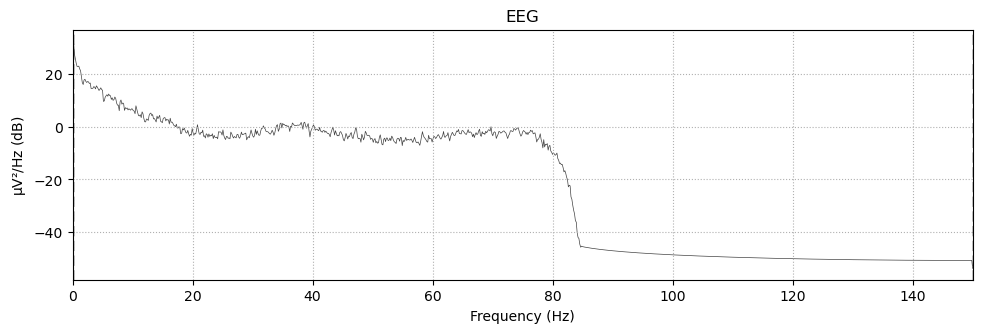

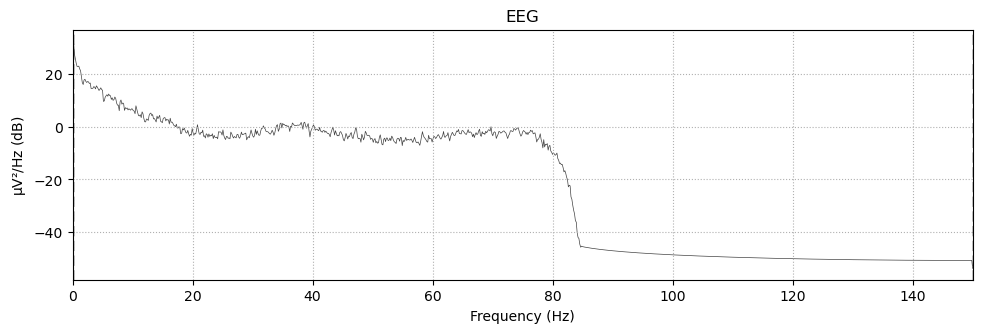

In [34]:
eeg = df_provided[0]
data = np.array([eeg])

info = mne.create_info(ch_names=['eeg'],
                       ch_types=['eeg'],
                       sfreq=sampling_freq)

simulated_raw = mne.io.RawArray(data, info)
# simulated_raw.plot(show_scrollbars=False, show_scalebars=False)
simulated_raw.plot_psd()
# plt.plot(test_r["time"],test_r[0])
# plt.show()